In [2]:
# Airline Sentiment Analysis - Full Project

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


import pandas as pd
import numpy as np
import re
import string
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load Dataset
df = pd.read_csv('Tweets.csv')  # You can download from Kaggle

# Keep important columns
df = df[['airline', 'airline_sentiment', 'text', 'negativereason']]
df.dropna(subset=['text'], inplace=True)

# Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+|#\w+", '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r"\d+", '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

# Encode labels
label_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['airline_sentiment'].map(label_map)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eyesl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eyesl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\eyesl\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eyesl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eyesl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\eyesl\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


✅ Accuracy: 0.7404371584699454

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.97      0.84      1835
     Neutral       0.70      0.29      0.41       620
    Positive       0.86      0.42      0.56       473

    accuracy                           0.74      2928
   macro avg       0.76      0.56      0.60      2928
weighted avg       0.75      0.74      0.70      2928

🧮 Confusion Matrix:
 [[1789   35   11]
 [ 419  181   20]
 [ 231   44  198]]


✅ Accuracy: 0.7404371584699454

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.97      0.84      1835
     Neutral       0.70      0.29      0.41       620
    Positive       0.86      0.42      0.56       473

    accuracy                           0.74      2928
   macro avg       0.76      0.56      0.60      2928
weighted avg       0.75      0.74      0.70      2928



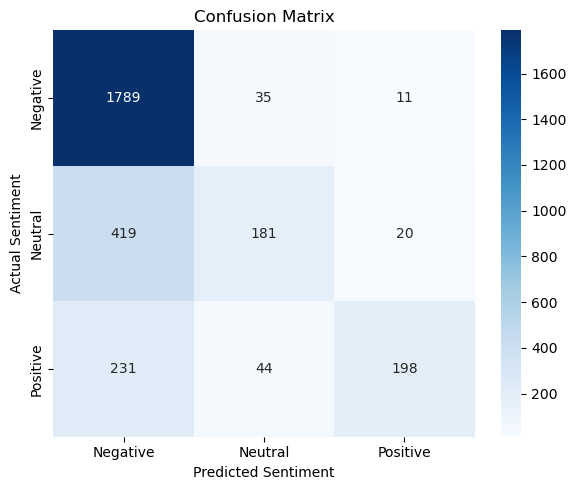

In [3]:
#Step 10: Model Evaluation (Accuracy, Confusion Matrix, Classification Report)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict
y_pred = model.predict(X_test)

# Classification metrics
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

# Confusion Matrix
labels = ['Negative', 'Neutral', 'Positive']
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual Sentiment")
plt.xlabel("Predicted Sentiment")
plt.tight_layout()
plt.show()


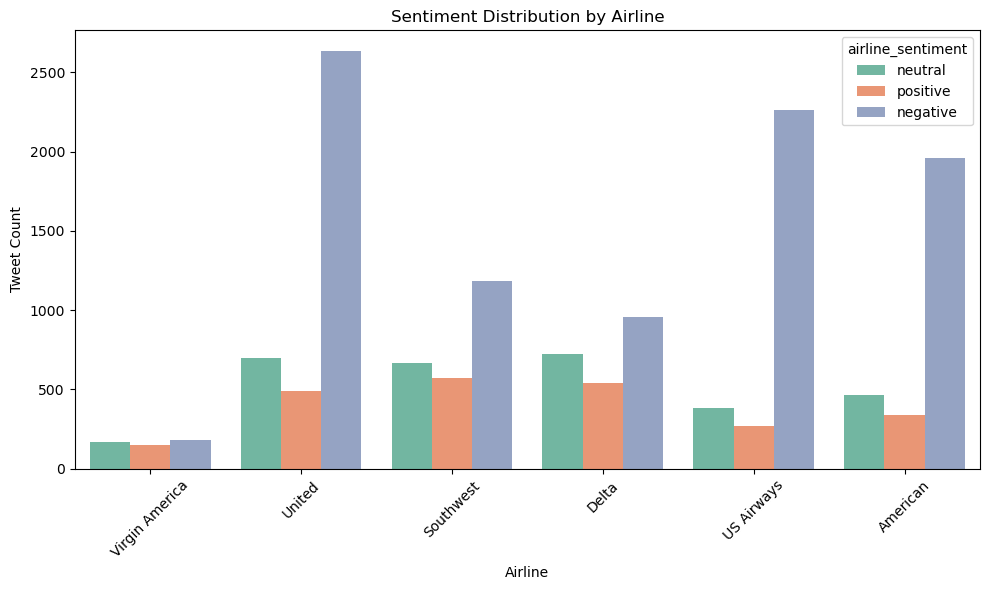

In [4]:
#Step 11: Visualizing Sentiment Trends
# Sentiment Distribution by Airline



plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette='Set2')
plt.title('Sentiment Distribution by Airline')
plt.ylabel('Tweet Count')
plt.xlabel('Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

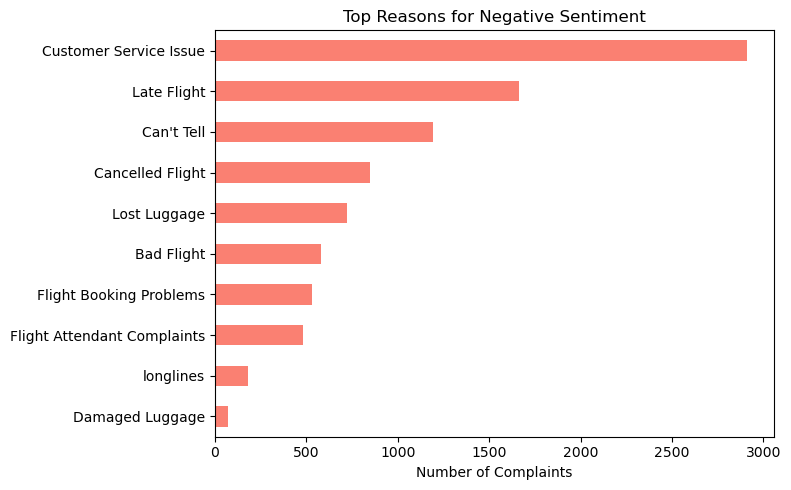

In [5]:
#Top 10 Reasons for Negative Sentiment

neg_reasons = df[df['airline_sentiment'] == 'negative']['negativereason'].value_counts().head(10)

plt.figure(figsize=(8, 5))
neg_reasons.plot(kind='barh', color='salmon')
plt.title('Top Reasons for Negative Sentiment')
plt.xlabel('Number of Complaints')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [7]:
print(df.columns)

Index(['airline', 'airline_sentiment', 'text', 'negativereason', 'clean_text',
       'label'],
      dtype='object')


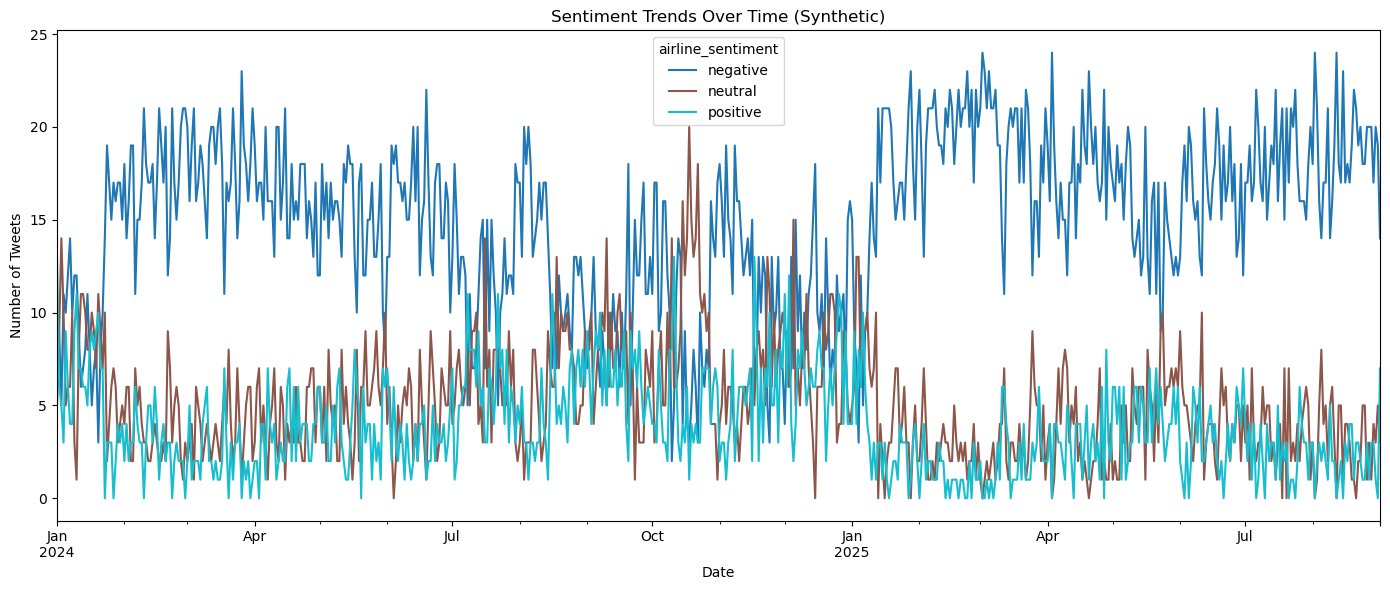

In [8]:
#Sentiment Over Time(op)

import numpy as np

# Simulate dates over a 30-day period
df['tweet_created'] = pd.date_range(start='2024-01-01', periods=len(df), freq='H')

df.set_index('tweet_created', inplace=True)

daily_sentiment = df.resample('D')['airline_sentiment'].value_counts().unstack().fillna(0)

# Plot
daily_sentiment.plot(figsize=(14, 6), cmap='tab10')
plt.title("Sentiment Trends Over Time (Synthetic)")
plt.ylabel("Number of Tweets")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [9]:
#Save Model for Deployment(BonzStp)

import pickle

# Save model and vectorizer
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
!streamlit run streamlit_app.py

In [ ]:
import os
print(os.getcwd())

In [10]:
# streamlit_app.py
import streamlit as st
import pickle
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load model and vectorizer
model = pickle.load(open('sentiment_model.pkl', 'rb'))
vectorizer = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))

# Clean text function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+|#\w+", '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r"\d+", '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

# Streamlit UI
st.title("✈️ Airline Tweet Sentiment Analyzer")
tweet = st.text_area("Enter a tweet related to an airline:")

if st.button("Analyze"):
    cleaned = clean_text(tweet)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    sentiment = ['Negative', 'Neutral', 'Positive'][pred]
    st.write(f"### Predicted Sentiment: **{sentiment}**")


2025-06-26 21:28:01.560 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 21:28:02.066 
  command:

    streamlit run C:\Users\eyesl\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-26 21:28:02.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 21:28:02.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 21:28:02.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 21:28:02.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 21:28:02.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 21:28:02.082 Thread 'MainThread': mi